<a href="https://colab.research.google.com/github/g2246462796/dive_into_deep_learning/blob/main/3%E7%BA%BF%E6%80%A7%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

在介绍深度神经网络之前，我们需要了解神经网络训练的基础知识。 本章我们将介绍神经网络的整个训练过程， 包括：定义简单的神经网络架构、数据处理、指定损失函数和如何训练模型。 为了更容易学习，我们将从经典算法————线性神经网络开始，介绍神经网络的基础知识。 经典统计学习技术中的线性回归和softmax回归可以视为线性神经网络， 这些知识将为本书其他部分中更复杂的技术奠定基础。

# 3.1 线性回归

回归（regression）是能为一个或多个自变量与因变量之间关系建模的一类方法。 在自然科学和社会科学领域，回归经常用来表示输入和输出之间的关系。

在机器学习领域中的大多数任务通常都与预测（prediction）有关。 当我们想预测一个数值时，就会涉及到回归问题。 常见的例子包括：预测价格（房屋、股票等）、预测住院时间（针对住院病人等）、 预测需求（零售销量等）。 但不是所有的预测都是回归问题。 在后面的章节中，我们将介绍分类问题。分类问题的目标是预测数据属于一组类别中的哪一个。

## 3.1.1 线性回归的基本元素

线性回归（linear regression）可以追溯到19世纪初， 它在回归的各种标准工具中最简单而且最流行。 线性回归基于几个简单的假设： 首先，假设自变量x
和因变量y
之间的关系是线性的， 即y
可以表示为x
中元素的加权和，这里通常允许包含观测值的一些噪声； 其次，我们假设任何噪声都比较正常，如噪声遵循正态分布。

为了解释线性回归，我们举一个实际的例子： 我们希望根据房屋的面积（平方英尺）和房龄（年）来估算房屋价格（美元）。 为了开发一个能预测房价的模型，我们需要收集一个真实的数据集。 这个数据集包括了房屋的销售价格、面积和房龄。 在机器学习的术语中，该数据集称为训练数据集（training data set） 或训练集（training set）。 每行数据（比如一次房屋交易相对应的数据）称为样本（sample）， 也可以称为数据点（data point）或数据样本（data instance）。 我们把试图预测的目标（比如预测房屋价格）称为标签（label）或目标（target）。 预测所依据的自变量（面积和房龄）称为特征（feature）或协变量（covariate）。

### 3.1.1.1 线性模型

线性假设是指目标（房屋价格）可以表示为特征（面积和房龄）的加权和。
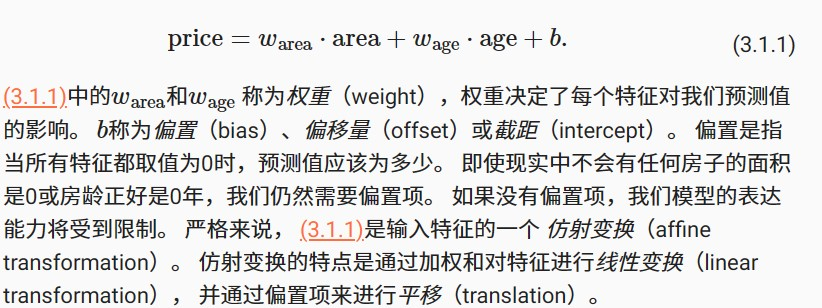

给定一个数据集，我们的目标是寻找模型的权重w
和偏置b
， 使得根据模型做出的预测大体符合数据里的真实价格。 输出的预测值由输入特征通过线性模型的仿射变换决定，仿射变换由所选权重和偏置确定。

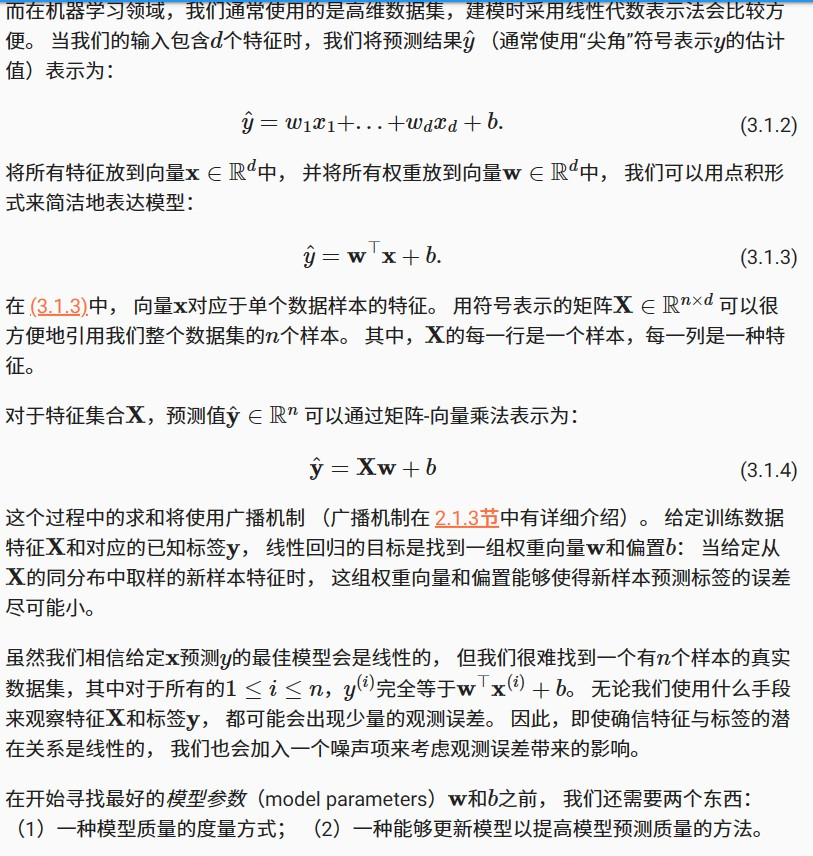

### 3.1.1.2 损失函数

在我们开始考虑如何用模型拟合（fit）数据之前，我们需要确定一个拟合程度的度量。 损失函数（loss function）能够量化目标的实际值与预测值之间的差距。 通常我们会选择非负数作为损失，且数值越小表示损失越小，完美预测时的损失为0。 回归问题中最常用的损失函数是平方误差函数。

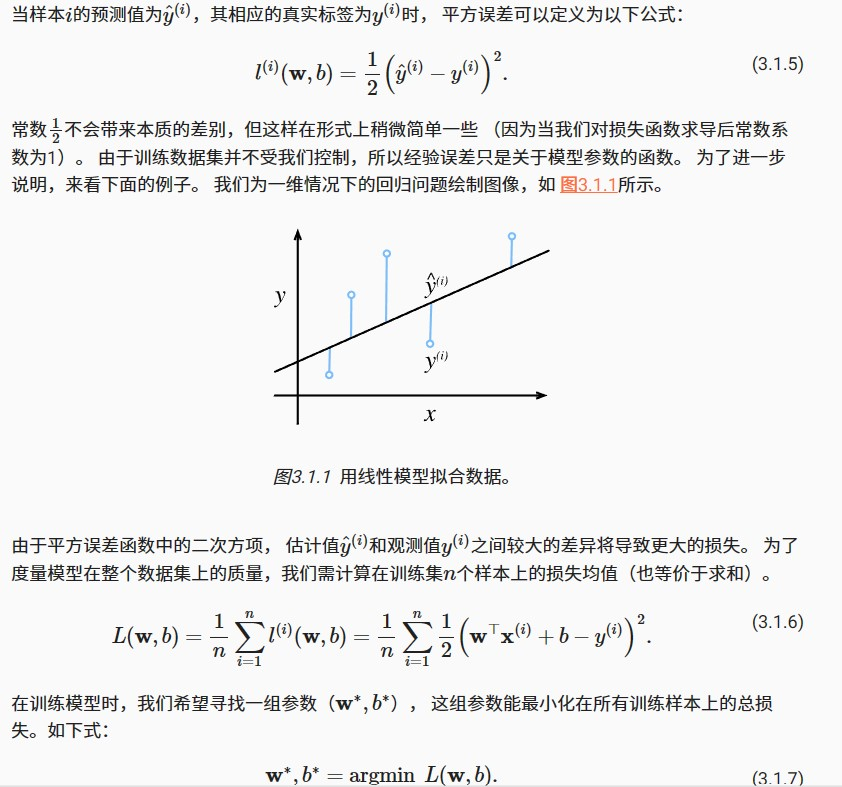

### 3.1.1.3 解析解

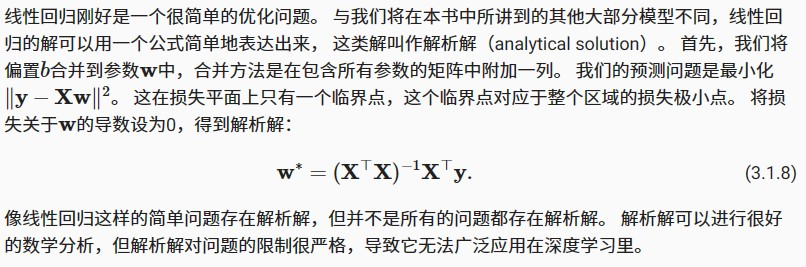

### 3.1.1.4 随机梯度下降

即使在我们无法得到解析解的情况下，我们仍然可以有效地训练模型。 在许多任务上，那些难以优化的模型效果要更好。 因此，弄清楚如何训练这些难以优化的模型是非常重要的。

本书中我们用到一种名为梯度下降（gradient descent）的方法， 这种方法几乎可以优化所有深度学习模型。 它通过不断地在损失函数递减的方向上更新参数来降低误差。

梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值） 关于模型参数的导数（在这里也可以称为梯度）。 但实际中的执行可能会非常慢：因为在每一次更新参数之前，我们必须遍历整个数据集。 因此，我们通常会在每次需要计算更新的时候随机抽取一小批样本， 这种变体叫做小批量随机梯度下降（minibatch stochastic gradient descent）。

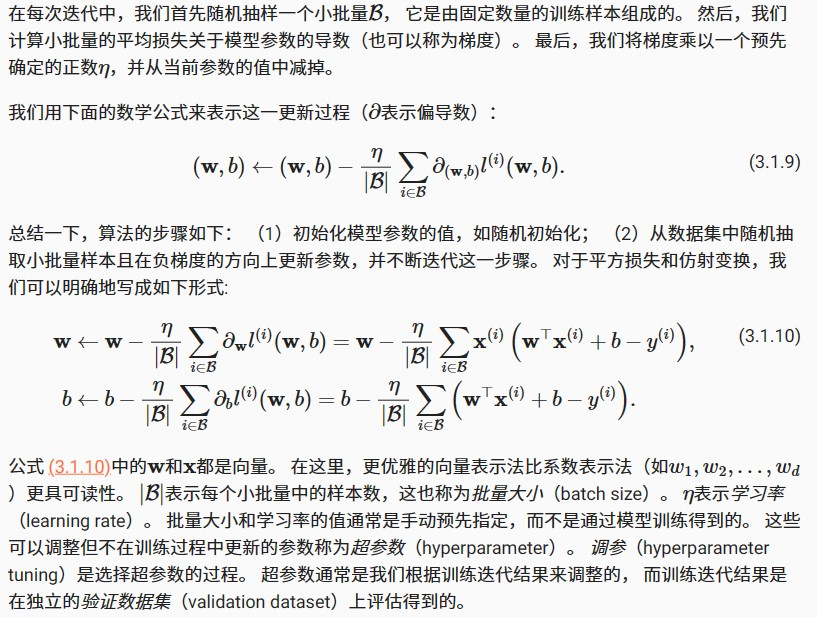

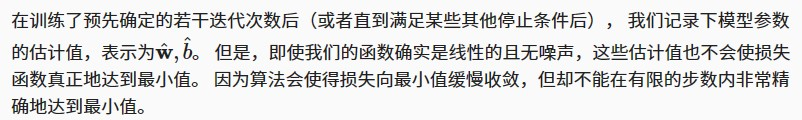

线性回归恰好是一个在整个域中只有一个最小值的学习问题。 但是对像深度神经网络这样复杂的模型来说，损失平面上通常包含多个最小值。 深度学习实践者很少会去花费大力气寻找这样一组参数，使得在训练集上的损失达到最小。 事实上，更难做到的是找到一组参数，这组参数能够在我们从未见过的数据上实现较低的损失， 这一挑战被称为泛化（generalization）

### 3.1.1.5 用模型进行预测

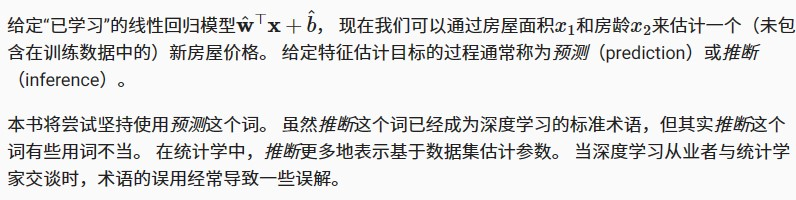

## 3.1.2 矢量化加速

在训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。 为了实现这一点，需要我们对计算进行矢量化， 从而利用线性代数库，而不是在Python中编写开销高昂的for循环。

In [ ]:
!pip install d2l
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

在训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。 为了实现这一点，需要我们对计算进行矢量化， 从而利用线性代数库，而不是在Python中编写开销高昂的for循环。

In [ ]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

由于在本书中我们将频繁地进行运行时间的基准测试，所以我们定义一个计时器：

In [ ]:
class Timer:
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

现在我们可以对工作负载进行基准测试。

首先，我们使用for循环，每次执行一位的加法。

In [ ]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.13366 sec'

或者，我们使用重载的+运算符来计算按元素的和。

In [ ]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00033 sec'

结果很明显，第二种方法比第一种方法快得多。 矢量化代码通常会带来数量级的加速。 另外，我们将更多的数学运算放到库中，而无须自己编写那么多的计算，从而减少了出错的可能性。

## 3.1.3 正态分布与平方损失

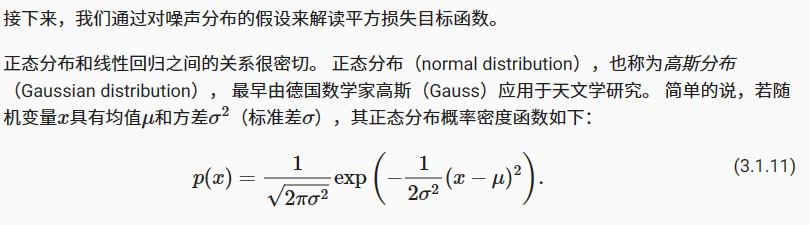

In [ ]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

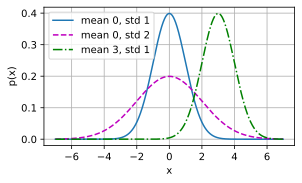

In [ ]:
# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

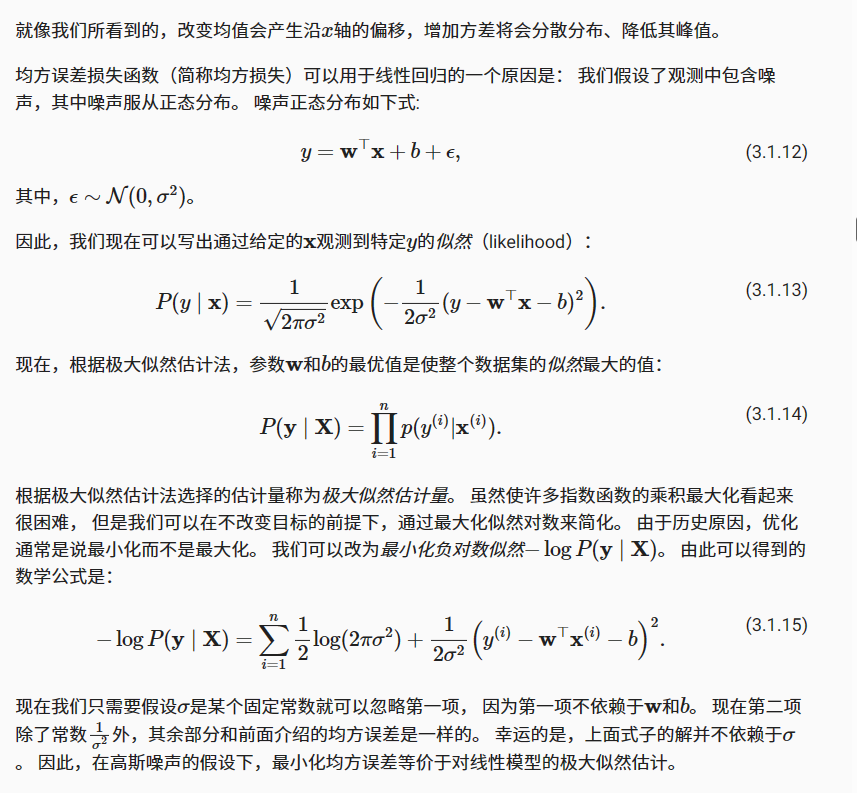

## 3.1.4 从线性回归到深度网络

到目前为止，我们只谈论了线性模型。 尽管神经网络涵盖了更多更为丰富的模型，我们依然可以用描述神经网络的方式来描述线性模型， 从而把线性模型看作一个神经网络。 首先，我们用“层”符号来重写这个模型。

### 3.1.4.1. 神经网络图

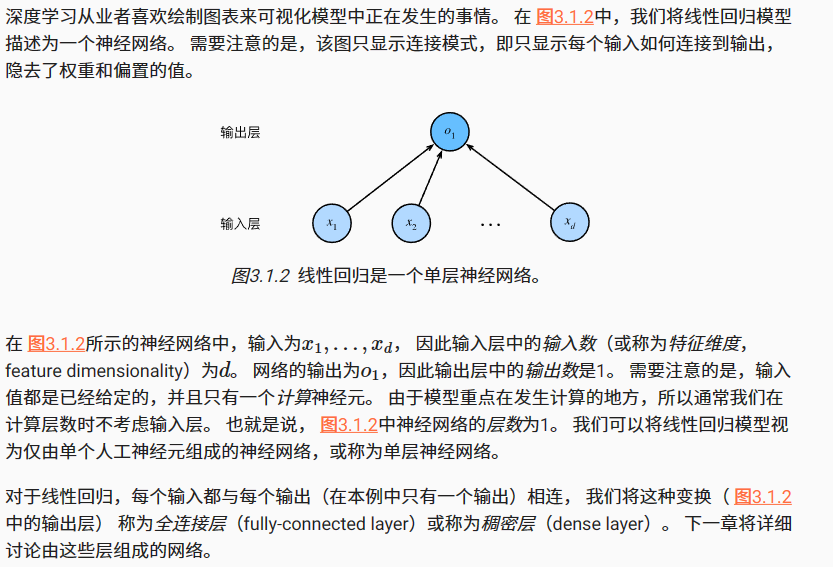

### 3.1.4.2. 生物学

当今大多数深度学习的研究几乎没有直接从神经科学中获得灵感。 我们援引斯图尔特·罗素和彼得·诺维格在他们的经典人工智能教科书 Artificial Intelligence:A Modern Approach (Russell and Norvig, 2016) 中所说的：虽然飞机可能受到鸟类的启发，但几个世纪以来，鸟类学并不是航空创新的主要驱动力。 同样地，如今在深度学习中的灵感同样或更多地来自数学、统计学和计算机科学。

## 3.1.5 小结


*   机器学习模型中的关键要素是训练数据、损失函数、优化算法，还有模型本身。

*   矢量化使数学表达上更简洁，同时运行的更快。

*   最小化目标函数和执行极大似然估计等价。

*   线性回归模型也是一个简单的神经网络。



# 3.2 线性回归的从零开始实现

在了解线性回归的关键思想之后，我们可以开始通过代码来动手实现线性回归了。 在这一节中，我们将从零开始实现整个方法， 包括数据流水线、模型、损失函数和小批量随机梯度下降优化器。 虽然现代的深度学习框架几乎可以自动化地进行所有这些工作，但从零开始实现可以确保我们真正知道自己在做什么。 同时，了解更细致的工作原理将方便我们自定义模型、自定义层或自定义损失函数。 在这一节中，我们将只使用张量和自动求导。 在之后的章节中，我们会充分利用深度学习框架的优势，介绍更简洁的实现方式。

In [ ]:
!pip install d2l
%matplotlib inline
import random
import torch
from d2l import torch as d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:


## 3.2.1 生成数据集

为了简单起见，我们将根据带有噪声的线性模型构造一个人造数据集。 我们的任务是使用这个有限样本的数据集来恢复这个模型的参数。 我们将使用低维数据，这样可以很容易地将其可视化。 在下面的代码中，我们生成一个包含1000个样本的数据集， 每个样本包含从标准正态分布中采样的2个特征。

In [ ]:
def synthetic_data(w,b,num_examples):
  """生成y=Xw+b+噪声"""
  X = torch.normal(0,1,(num_examples,len(w)))
  y = torch.matmul(X,w) + b
  y += torch.normal(0,0.01,y.shape)
  return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

注意，features中的每一行都包含一个二维数据样本， labels中的每一行都包含一维标签值（一个标量）。

In [ ]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.0845, 0.8702]) 
label: tensor([1.3945])


通过生成第二个特征features[:, 1]和labels的散点图， 可以直观观察到两者之间的线性关系。

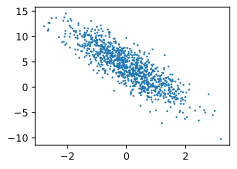

In [ ]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

## 3.2.2 读取数据集

回想一下，训练模型时要对数据集进行遍历，每次抽取一小批量样本，并使用它们来更新我们的模型。 由于这个过程是训练机器学习算法的基础，所以有必要定义一个函数， 该函数能打乱数据集中的样本并以小批量方式获取数据。

在下面的代码中，我们定义一个data_iter函数， 该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量。 每个小批量包含一组特征和标签。

In [ ]:
def data_iter(batch_size,features,labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  # 这些样本是随机读取的，没有特定的顺序
  random.shuffle(indices)
  for i in range(0,num_examples,batch_size):
    batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
    yield features[batch_indices],labels[batch_indices]

通常，我们利用GPU并行运算的优势，处理合理大小的“小批量”。 每个样本都可以并行地进行模型计算，且每个样本损失函数的梯度也可以被并行计算。 GPU可以在处理几百个样本时，所花费的时间不比处理一个样本时多太多。

我们直观感受一下小批量运算：读取第一个小批量数据样本并打印。 每个批量的特征维度显示批量大小和输入特征数。 同样的，批量的标签形状与batch_size相等。

In [ ]:
batch_size = 10

for X,y in data_iter(batch_size,features,labels):
  print(X,'\n',y)
  break

tensor([[-1.2949, -1.3573],
        [-0.6377,  1.1061],
        [-1.9171, -0.0781],
        [-0.6205,  0.2793],
        [ 1.0550,  1.4892],
        [-1.2474, -0.3421],
        [ 1.1723,  0.6686],
        [ 1.8218,  0.7302],
        [-0.3738,  0.2566],
        [-1.5594, -0.8784]]) 
 tensor([[ 6.2312],
        [-0.8450],
        [ 0.6317],
        [ 2.0027],
        [ 1.2473],
        [ 2.8561],
        [ 4.2778],
        [ 5.3611],
        [ 2.5776],
        [ 4.0636]])


当我们运行迭代时，我们会连续地获得不同的小批量，直至遍历完整个数据集。 上面实现的迭代对教学来说很好，但它的执行效率很低，可能会在实际问题上陷入麻烦。 例如，它要求我们将所有数据加载到内存中，并执行大量的随机内存访问。 在深度学习框架中实现的内置迭代器效率要高得多， 它可以处理存储在文件中的数据和数据流提供的数据。

## 3.2.3 初始化模型参数

在我们开始用小批量随机梯度下降优化我们的模型参数之前， 我们需要先有一些参数。 在下面的代码中，我们通过从均值为0、标准差为0.01的正态分布中采样随机数来初始化权重， 并将偏置初始化为0。

In [ ]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
# help(torch.normal)
w,b

(tensor([[-0.0066],
         [ 0.0008]], requires_grad=True),
 tensor([0.], requires_grad=True))

在初始化参数之后，我们的任务是更新这些参数，直到这些参数足够拟合我们的数据。 每次更新都需要计算损失函数关于模型参数的梯度。 有了这个梯度，我们就可以向减小损失的方向更新每个参数。 因为手动计算梯度很枯燥而且容易出错，所以没有人会手动计算梯度。 我们使用 2.5节中引入的自动微分来计算梯度。

## 3.2.4 定义模型

接下来，我们必须定义模型，将模型的输入和参数同模型的输出关联起来。

In [ ]:
def linreg(X,w,b):
  """线性回归模型"""
  return torch.matmul(X,w)+b


## 3.2.5 定义损失函数

因为需要计算损失函数的梯度，所以我们应该先定义损失函数。 这里我们使用 3.1节中描述的平方损失函数。 在实现中，我们需要将真实值y的形状转换为和预测值y_hat的形状相同。

In [ ]:
def squared_loss(y_hat,y):
  """均方损失"""
  return (y_hat - y.reshape(y_hat.shape) ** 2/2)

## 3.2.6 定义优化算法

这里我们介绍小批量随机梯度下降。

在每一步中，使用从数据集中随机抽取的一个小批量，然后根据参数计算损失的梯度。 接下来，朝着减少损失的方向更新我们的参数。 下面的函数实现小批量随机梯度下降更新。 该函数接受模型参数集合、学习速率和批量大小作为输入。每 一步更新的大小由学习速率lr决定。 因为我们计算的损失是一个批量样本的总和，所以我们用批量大小（batch_size） 来规范化步长，这样步长大小就不会取决于我们对批量大小的选择。

In [ ]:
def sgd(params,lr,batch_size):
  """小批量随机梯度下降"""
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad/batch_size
      param.grad.zero_()

## 3.2.7 训练

现在我们已经准备好了模型训练所有需要的要素，可以实现主要的训练过程部分了。 理解这段代码至关重要，因为从事深度学习后， 相同的训练过程几乎一遍又一遍地出现。 在每次迭代中，我们读取一小批量训练样本，并通过我们的模型来获得一组预测。 计算完损失后，我们开始反向传播，存储每个参数的梯度。 最后，我们调用优化算法sgd来更新模型参数。

概括一下，我们将执行以下循环：

*   初始化参数
*   重复以下训练
    *   计算梯度
    *   更新参数





在每个迭代周期（epoch）中，我们使用data_iter函数遍历整个数据集， 并将训练数据集中所有样本都使用一次（假设样本数能够被批量大小整除）。 这里的迭代周期个数num_epochs和学习率lr都是超参数，分别设为3和0.03。 设置超参数很棘手，需要通过反复试验进行调整。 我们现在忽略这些细节，以后会在 11节中详细介绍。

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X,y in data_iter(batch_size,features,labels):
    l = loss(net(X,w,b),y) # X和y的小批量损失
    # 因为l形状是(batch_size,1)，二不是一个标量，l中的所有元素被加到一起，
    # 并以此计算关于[w,b]的梯度
    l.sum().backward()
    sgd([w,b],lr,batch_size) # 使用参数的梯度更新参数

因为我们使用的是自己合成的数据集，所以我们知道真正的参数是什么。 因此，我们可以通过比较真实参数和通过训练学到的参数来评估训练的成功程度。 事实上，真实参数和通过训练学到的参数确实非常接近。

In [ ]:
print(f'w的估计误差:{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差:{true_b - b}')

w的估计误差:tensor([ 2.1366, -2.9647], grad_fn=<SubBackward0>)
b的估计误差:tensor([13.2000], grad_fn=<RsubBackward1>)


注意，我们不应该想当然地认为我们能够完美地求解参数。 在机器学习中，我们通常不太关心恢复真正的参数，而更关心如何高度准确预测参数。 幸运的是，即使是在复杂的优化问题上，随机梯度下降通常也能找到非常好的解。 其中一个原因是，在深度网络中存在许多参数组合能够实现高度精确的预测。

## 3.2.8 小结



*   我们学习了深度学习是如何实现和优化的。在这一过程中只使用张量和自动微分，不需要定义层或复杂的优化器。
*   这一节只触及表面知识。下面，基于刚刚介绍的概念描述其他模型，并学习如何更简洁地实现其他模型。



# 3.3 线性回归的简洁实现

在 3.2节中，我们只运用了： （1）通过张量来进行数据存储和线性代数； （2）通过自动微分来计算梯度。 实际上，由于数据迭代器、损失函数、优化器和神经网络层很常用， 现代深度学习库也为我们实现了这些组件。

## 3.3.1 生成数据集

In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = d2l.synthetic_data(true_w,true_b,1000)

## 3.3.2 读取数据集

我们可以调用框架中现有的API来读取数据。 我们将features和labels作为API的参数传递，并通过数据迭代器指定batch_size。 此外，布尔值is_train表示是否希望数据迭代器对象在每个迭代周期内打乱数据。

In [ ]:
def load_array(data_arrays,batch_size,is_train=True):
  """构造一个PyTorch数据迭代器"""
  dataset = data.TensorDataset(*data_arrays)
  return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size = 10
data_iter = load_array((features,labels),batch_size)

为了验证是否正常工作，让我们读取并打印第一个小批量样本。这里使用iter构造Python迭代器,并使用next从迭代器中获取第一项。

In [ ]:
next(iter(data_iter))

[tensor([[-0.5628, -0.0830],
         [-1.6465,  0.7964],
         [ 0.9294, -0.0290],
         [ 1.2151, -0.1212],
         [ 0.6092,  1.5800],
         [ 1.1638,  3.0486],
         [ 1.0681, -0.0159],
         [-0.1831, -1.2617],
         [-0.4404,  0.0619],
         [ 1.6438,  0.8179]]),
 tensor([[ 3.3651],
         [-1.8053],
         [ 6.1630],
         [ 7.0620],
         [ 0.0364],
         [-3.8246],
         [ 6.3744],
         [ 8.1035],
         [ 3.1053],
         [ 4.7128]])]

## 3.3.3 定义模型


当我们在 3.2节中实现线性回归时， 我们明确定义了模型参数变量，并编写了计算的代码，这样通过基本的线性代数运算得到输出。 但是，如果模型变得更加复杂，且当我们几乎每天都需要实现模型时，自然会想简化这个过程。 这种情况类似于为自己的博客从零开始编写网页。 做一两次是有益的，但如果每个新博客就需要工程师花一个月的时间重新开始编写网页，那并不高效。

对于标准深度学习模型，我们可以使用框架的预定义好的层。这使我们只需关注使用哪些层来构造模型，而不必关注层的实现细节。 我们首先定义一个模型变量net，它是一个Sequential类的实例。 Sequential类将多个层串联在一起。 当给定输入数据时，Sequential实例将数据传入到第一层， 然后将第一层的输出作为第二层的输入，以此类推。 在下面的例子中，我们的模型只包含一个层，因此实际上不需要Sequential。 但是由于以后几乎所有的模型都是多层的，在这里使用Sequential会让你熟悉“标准的流水线”。

这一单层被称为全连接层（fully-connected layer）， 因为它的每一个输入都通过矩阵-向量乘法得到它的每个输出。

In [ ]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

## 3.3.4 初始化模型参数

在使用net之前，我们需要初始化模型参数。 如在线性回归模型中的权重和偏置。 深度学习框架通常有预定义的方法来初始化参数。 在这里，我们指定每个权重参数应该从均值为0、标准差为0.01的正态分布中随机采样， 偏置参数将初始化为零。

正如我们在构造nn.Linear时指定输入和输出尺寸一样， 现在我们能直接访问参数以设定它们的初始值。 我们通过net[0]选择网络中的第一个图层， 然后使用weight.data和bias.data方法访问参数。 我们还可以使用替换方法normal_和fill_来重写参数值。

In [ ]:
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

tensor([0.])

## 3.3.5定义损失函数

In [ ]:
loss = nn.MSELoss() #误差平均值

## 3.3.6 定义优化算法

小批量随机梯度下降算法是一种优化神经网络的标准工具， PyTorch在optim模块中实现了该算法的许多变种。 当我们实例化一个SGD实例时，我们要指定优化的参数 （可通过net.parameters()从我们的模型中获得）以及优化算法所需的超参数字典。 小批量随机梯度下降只需要设置lr值，这里设置为0.03。

In [ ]:
trainer = torch.optim.SGD(net.parameters(),lr=0.03)

## 3.3.7 训练

通过深度学习框架的高级API来实现我们的模型只需要相对较少的代码。 我们不必单独分配参数、不必定义我们的损失函数，也不必手动实现小批量随机梯度下降。 当我们需要更复杂的模型时，高级API的优势将大大增加。 当我们有了所有的基本组件，训练过程代码与我们从零开始实现时所做的非常相似。


小批量梯度下降法,每次传进一个小批量
*   前向传播
*   反向传播
*   更新参数



In [ ]:
num_epochs = 3
for epoch in range(num_epochs):
  for X,y in data_iter:
    l = loss(net(X),y)
    trainer.zero_grad()
    l.backward()
    trainer.step()
  l = loss(net(features),labels)
  print(f'epoch {epoch+1},loss: {l:f}')

epoch 1,loss: 0.000097
epoch 2,loss: 0.000096
epoch 3,loss: 0.000097


通过深度学习框架的高级API来实现我们的模型只需要相对较少的代码。 我们不必单独分配参数、不必定义我们的损失函数，也不必手动实现小批量随机梯度下降。 当我们需要更复杂的模型时，高级API的优势将大大增加。 当我们有了所有的基本组件，训练过程代码与我们从零开始实现时所做的非常相似。

In [ ]:
w = net[0].weight.data
print('w的估计误差: ',true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差: ',true_b - b)

w的估计误差:  tensor([ 0.0006, -0.0005])
b的估计误差:  tensor([-0.0006])


## 3.3.8 小结



*   我们使用PyTorch的高级API更简洁地实现模型
*   在PyTorch中，data模块提供了数据处理工具，nn模块定义了大量的神经网络层和常见损失函数。
*   我们可以通过_结尾的方法将参数替换，从而初始化参数。



# 3.4 softmax回归

回归可以用于预测多少的问题，

我们也对分类问题感兴趣，问“哪一个”而非“多少”



通常，机器学习实践者用分类这个词来描述两个有微妙差别的问题： 1. 我们只对样本的“硬性”类别感兴趣，即属于哪个类别； 2. 我们希望得到“软性”类别，即得到属于每个类别的概率。 这两者的界限往往很模糊。其中的一个原因是：即使我们只关心硬类别，我们仍然使用软类别的模型。

## 3.4.1 分类问题

怎样表示分类问题?

1.整数表示,但是显然，这种方法并没有实际意义

2.我们采用独热编码的方式，分量和类别一样多:

例:{(1,0,0),(0,1,0),(0,0,1)}

## 3.4.2 网络架构

为了估计所有可能类别的条件概率，我们需要一个有多个输出的模型，每个类别对应一个输出。

我们需要和输出一样的放射函数，细节略。

我们用softmax回归来表示这种计算过程。

拓扑结构:

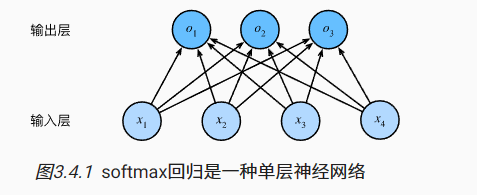

## 3.4.3 全连接层的参数开销


在深度学习中，全连接层无处不在，关于全连接层:

“完全”连接，参数极多，O(dq),但是可以减少到O(dq/n),n由我们灵活指定，来平衡参数节约和模型有效性。



## 3.4.4 softmax运算

正常预测时，我们希望得到q个概率值，取最大的为我们预测的类别。

但是对于全连接层的输出，并不是规范的概率值，可能为负值或者大于1的值，因此需要保证非负且总和为1.

我们需要一个训练的目标函数，来激励模型准确地估计概率。

社会科学家邓肯·卢斯于1959年在选择模型（choice model）的理论基础上 发明的softmax函数正是这样做的： softmax函数能够将未规范化的预测变换为非负数并且总和为1，同时让模型保持 可导的性质。

softmax本质上就是一个指数归一化函数。

尽管softmax是一个非线性函数，但softmax回归的输出仍然由输入特征的仿射变换决定。 因此，softmax回归是一个线性模型（linear model）。


## 3.4.5 小批量样本的矢量化

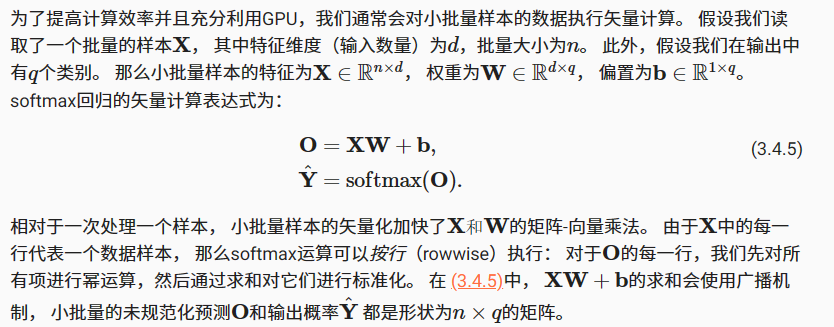

## 3.4.6 损失函数

接下来，我们需要一个损失函数来度量预测的效果。 我们将使用最大似然估计，这与在线性回归 （ 3.1.3节） 中的方法相同。

### 3.4.6.1 对数似然

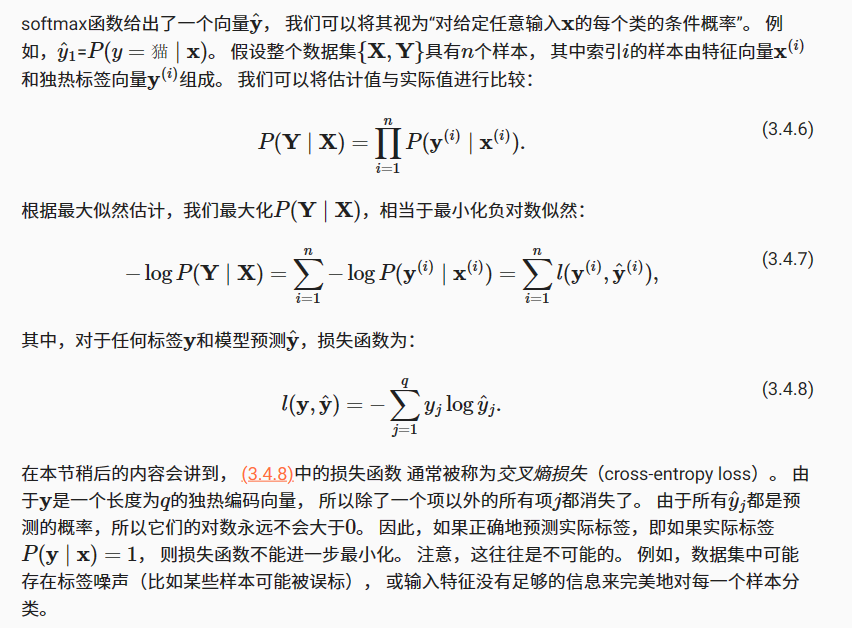

### 3.4.6.2 softmax及其导数

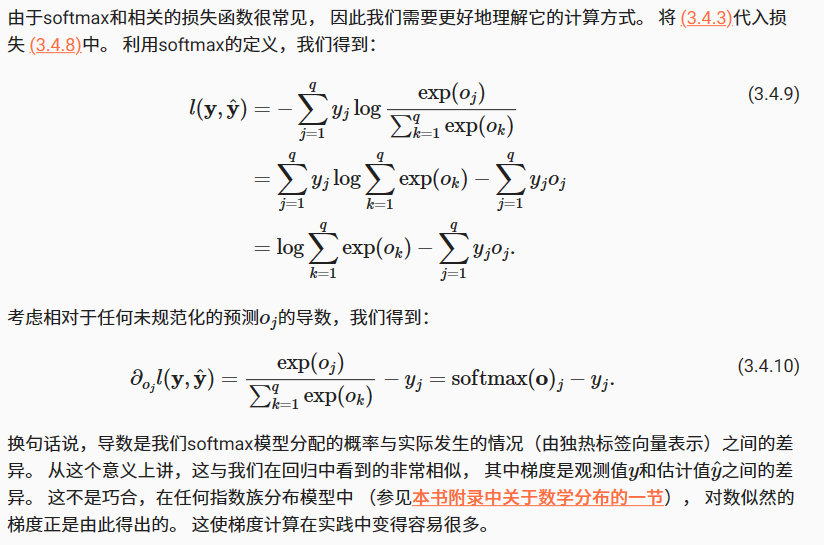

### 3.4.6.3 交叉熵损失

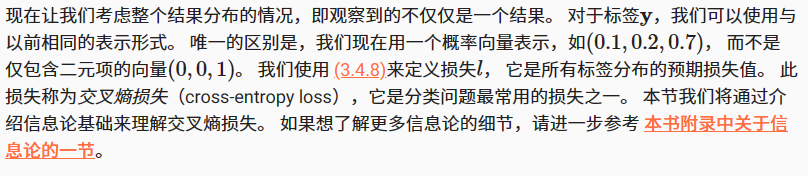

## 3.4.7 信息论基础

信息论（information theory）涉及编码、解码、发送以及尽可能简洁地处理信息或数据。

### 3.4.7.1 熵

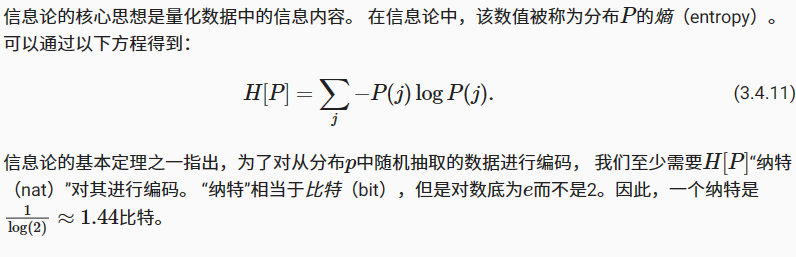

### 3.4.7.2 信息量

压缩与预测有什么关系呢？ 想象一下，我们有一个要压缩的数据流。 如果我们很容易预测下一个数据，那么这个数据就很容易压缩。 为什么呢？ 举一个极端的例子，假如数据流中的每个数据完全相同，这会是一个非常无聊的数据流。 由于它们总是相同的，我们总是知道下一个数据是什么。 所以，为了传递数据流的内容，我们不必传输任何信息。也就是说，“下一个数据是xx”这个事件毫无信息量。

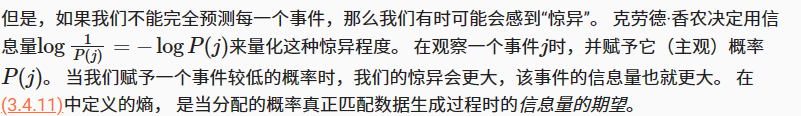

### 3.4.7.3 重新审视交叉熵

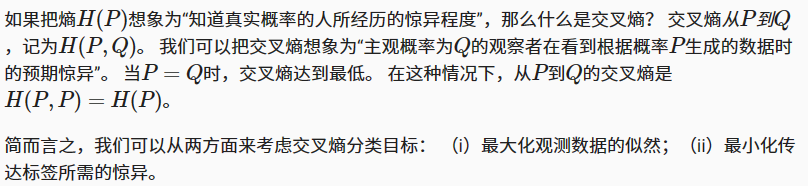

## 3.4.8 模型预测和评估

在训练softmax回归模型后，给出任何样本特征，我们可以预测每个输出类别的概率。 通常我们使用预测概率最高的类别作为输出类别。 如果预测与实际类别（标签）一致，则预测是正确的。 在接下来的实验中，我们将使用精度（accuracy）来评估模型的性能。 精度等于正确预测数与预测总数之间的比率。

## 3.4.9 小结



*   softmax运算获取一个向量并将其映射为概率
*   softmax回归适用于分类问题,它使用了softmax运算中输出类别的概率分布
*   交叉熵是一个衡量两个概率分布之间差异的很好的度量，它测量给定模型编码数据所需的比特数。



# 3.5 图像分类数据集

MNIST数据集 (LeCun et al., 1998) 是图像分类中广泛使用的数据集之一，但作为基准数据集过于简单。 我们将使用类似但更复杂的Fashion-MNIST数据集 (Xiao et al., 2017)。

In [ ]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

## 3.5.1 读取数据集

通过内置函数下载数据集并读取到内存中

In [ ]:
# 通过ToTensor实例将图像数据从PIL类型变换到32位浮点数格式
# 并除以255使得所有像素的数值均在0-1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root = "../data",train=True,transform=trans,download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root = "../data",train=False,transform=trans,download=True
)

In [ ]:
len(mnist_train),len(mnist_test)

(60000, 10000)

每个输入图像的高度和宽度均为28像素。 数据集由灰度图像组成，其通道数为1。 为了简洁起见，本书将高度h像素、宽度w像素图像的形状记为h*w
或（h,w）。



In [ ]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

Fashion-MNIST中包含的10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。 以下函数用于在数字标签索引及其文本名称之间进行转换。

In [ ]:
def get_fashion_mnist_labels(labels):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

我们现在可以创建一个函数来可视化这些样本。

In [ ]:
def show_images(imgs,num_rows,num_cols,titles=None,scale=1.5):
  """绘制图像列表"""
  figsize = (num_cols * scale, num_rows * scale)
  _,axes = d2l.plt.subplots(num_rows,num_cols,figsize=figsize)
  axes = axes.flatten()
  for i,(ax,img) in enumerate(zip(axes,imgs)):
    if torch.is_tensor(img):
      # 图像张量
      ax.imshow(img.numpy())
    else:
      # PIL图片
      ax.inshow(img)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if titles:
      ax.set_title(titles[i])
  return axes

以下是训练数据集中前几个样本的图像及其相应的标签。

array([<Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 't-shirt'}>], dtype=object)

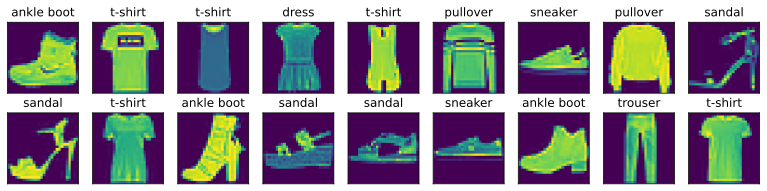

In [ ]:
X,y = next(iter(data.DataLoader(mnist_train,batch_size=18)))
show_images(X.reshape(18,28,28),2,9,titles=get_fashion_mnist_labels(y))

## 3.5.2 读取小批量

为了使我们在读取训练集和测试集时更容易，我们使用内置的数据迭代器，而不是从零开始创建。 回顾一下，在每次迭代中，数据加载器每次都会读取一小批量数据，大小为batch_size。 通过内置数据迭代器，我们可以随机打乱了所有样本，从而无偏见地读取小批量。

In [ ]:
batch_size = 256
def get_dataloader_workers():
  """使用2个进程来读取数据"""
  return 2

train_iter = data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers())

In [ ]:
timer = d2l.Timer()
for X,y in train_iter:
  continue
f'{timer.stop():.2f} sec'

'10.19 sec'

## 3.5.3 整合所有组件

现在我们定义load_data_fashion_mnist函数，用于获取和读取Fashion-MNIST数据集。 这个函数返回训练集和验证集的数据迭代器。 此外，这个函数还接受一个可选参数resize，用来将图像大小调整为另一种形状。

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [ ]:
train_iter,test_iter = load_data_fashion_mnist(32,resize=64)
for X,y in train_iter:
  print(X.shape,X.dtype,y.shape,y.dtype)
  break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


## 3.5.4 小结



*   Fashion MNIST是一个服装分类数据集，由10个类别的图像组成。后续用此数据集来评估各种分类算法
*   高度h宽度w的图像记为hXw或者(h,w)
*   数据迭代器是获得更高性能的关键组件。依靠实现良好的数据迭代器，利用高性能计算来避免减慢训练过程。



#  3.6 softmax回归的从零开始实现

就像我们从零开始实现线性回归一样， 我们认为softmax回归也是重要的基础，因此应该知道实现softmax回归的细节。 本节我们将使用刚刚在 3.5节中引入的Fashion-MNIST数据集， 并设置数据迭代器的批量大小为256。

In [ ]:
!pip install d2l
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 98.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
 

100%|██████████| 26421880/26421880 [00:01<00:00, 19010713.76it/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 330892.65it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5497080.87it/s]


100%|██████████| 5148/5148 [00:00<00:00, 18068851.04it/s]


Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## 3.6.1 初始化模型参数

和之前线性回归的例子一样，这里的每个样本都将用固定长度的向量表示。 原始数据集中的每个样本都是28 X 28
的图像。 本节将展平每个图像，把它们看作长度为784的向量。 在后面的章节中，我们将讨论能够利用图像空间结构的特征， 但现在我们暂时只把每个像素位置看作一个特征。

回想一下，在softmax回归中，我们的输出与类别一样多。 因为我们的数据集有10个类别，所以网络输出维度为10。 因此，权重将构成一个784 X 10
的矩阵， 偏置将构成一个1X10
的行向量。 与线性回归一样，我们将使用正态分布初始化我们的权重W，偏置初始化为0。

In [ ]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0,0.01,size=(num_inputs,num_outputs),requires_grad = True)
b = torch.zeros(num_outputs,requires_grad=True)

## 3.6.2 定义softmax操作

回想一下，在softmax回归中，我们的输出与类别一样多。 因为我们的数据集有10个类别，所以网络输出维度为10。 因此，权重将构成一个
的矩阵， 偏置将构成一个
的行向量。 与线性回归一样，我们将使用正态分布初始化我们的权重W，偏置初始化为0。

In [ ]:
X = torch.tensor([[1.0,2.0,3.0],[4.0,5.0,6.0]])
X.sum(0,keepdim=True),X.sum(1,keepdim=True)

(tensor([5., 7., 9.]), tensor([ 6., 15.]))

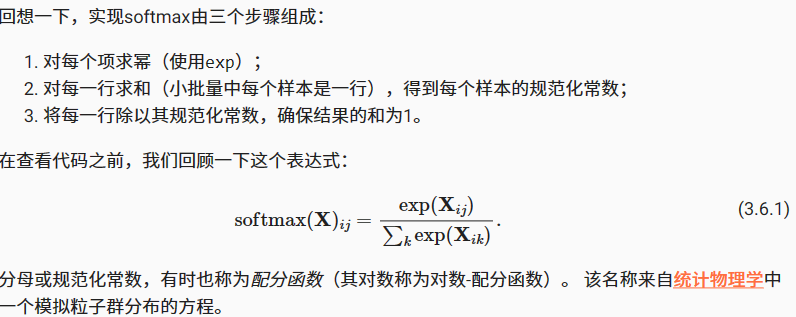

In [ ]:
def softmax(X):
  X_exp = torch.exp(X)
  partition = X_exp.sum(1,keepdim=True)
  return X_exp / partition #这里有广播机制

正如上述代码，对于任何随机输入，我们将每个元素变成一个非负数。 此外，依据概率原理，每行总和为1。

In [ ]:
X = torch.normal(0,1,(2,5))
X_prob = softmax(X)
X_prob,X_prob.sum(1)

(tensor([[0.0345, 0.5853, 0.1628, 0.1900, 0.0275],
         [0.1814, 0.0525, 0.0793, 0.5512, 0.1356]]),
 tensor([1., 1.]))

注意，虽然这在数学上看起来是正确的，但我们在代码实现中有点草率。 矩阵中的非常大或非常小的元素可能造成数值上溢或下溢，但我们没有采取措施来防止这点。

## 3.6.3 定义模型

定义softmax操作后，我们可以实现softmax回归模型。 下面的代码定义了输入如何通过网络映射到输出。 注意，将数据传递到模型之前，我们使用reshape函数将每张原始图像展平为向量。

In [ ]:
def net(X):
  return softmax(torch.matmul(X.reshape((-1,W.shape[0])),W)+b)

## 3.6.4 定义损失函数

接下来，我们实现 3.4节中引入的交叉熵损失函数。 这可能是深度学习中最常见的损失函数，因为目前分类问题的数量远远超过回归问题的数量。

回顾一下，交叉熵采用真实标签的预测概率的负对数似然。 这里我们不使用Python的for循环迭代预测（这往往是低效的）， 而是通过一个运算符选择所有元素。 下面，我们创建一个数据样本y_hat，其中包含2个样本在3个类别的预测概率， 以及它们对应的标签y。 有了y，我们知道在第一个样本中，第一类是正确的预测； 而在第二个样本中，第三类是正确的预测。 然后使用y作为y_hat中概率的索引， 我们选择第一个样本中第一个类的概率和第二个样本中第三个类的概率。

In [ ]:
y = torch.tensor([0,2])
y_hat = torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]])
y_hat[[0,1],y]

tensor([0.1000, 0.5000])

现在我们只需一行代码就可以实现交叉熵损失函数。

In [ ]:
def cross_entropy(y_hat,y):
  return - torch.log(y_hat[range(len(y_hat)),y])

cross_entropy(y_hat,y)

tensor([2.3026, 0.6931])

## 3.6.5 分类精度

给定预测概率分布y_hat，当我们必须输出硬预测（hard prediction）时， 我们通常选择预测概率最高的类。 许多应用都要求我们做出选择。如Gmail必须将电子邮件分类为“Primary（主要邮件）”、 “Social（社交邮件）”“Updates（更新邮件）”或“Forums（论坛邮件）”。 Gmail做分类时可能在内部估计概率，但最终它必须在类中选择一个。

当预测与标签分类y一致时，即是正确的。 分类精度即正确预测数量与总预测数量之比。 虽然直接优化精度可能很困难（因为精度的计算不可导）， 但精度通常是我们最关心的性能衡量标准，我们在训练分类器时几乎总会关注它。

为了计算精度，我们执行以下操作。 首先，如果y_hat是矩阵，那么假定第二个维度存储每个类的预测分数。 我们使用argmax获得每行中最大元素的索引来获得预测类别。 然后我们将预测类别与真实y元素进行比较。 由于等式运算符“==”对数据类型很敏感， 因此我们将y_hat的数据类型转换为与y的数据类型一致。 结果是一个包含0（错）和1（对）的张量。 最后，我们求和会得到正确预测的数量。

In [ ]:
def accuracy(y_hat,y):
  """计算预测正确的数量"""
  if len(y_hat.shape)>1 and y_hat.shape[1]>1:
    y_hat = y_hat.argmax(axis=1)
  cmp = y_hat.type(y.dtype) == y
  return float(cmp.type(y.dtype).sum())

我们将继续使用之前定义的变量y_hat和y分别作为预测的概率分布和标签。 可以看到，第一个样本的预测类别是2（该行的最大元素为0.6，索引为2），这与实际标签0不一致。 第二个样本的预测类别是2（该行的最大元素为0.5，索引为2），这与实际标签2一致。 因此，这两个样本的分类精度率为0.5。

In [ ]:
accuracy(y_hat,y)/len(y)

0.5

同样，对于任意数据迭代器data_iter可访问的数据集， 我们可以评估在任意模型net的精度。

In [ ]:
def evaluate_accuracy(net,data_iter):
  """计算在指定数据集上模型的精度"""
  if isinstance(net,torch.nn.Module):
    net.eval() # 将模型设置为评估模型
  metric = Accumulator(2) # 正确预测数、预测总数
  with torch.no_grad():
    for X,y in data_iter:
      metric.add(accuracy(net(X),y),y.numel())
  return metric.data[0]/metric.data[1]

这里定义一个实用程序类Accumulator，用于对多个变量进行累加。 在上面的evaluate_accuracy函数中， 我们在Accumulator实例中创建了2个变量， 分别用于存储正确预测的数量和预测的总数量。 当我们遍历数据集时，两者都将随着时间的推移而累加。

In [ ]:
class Accumulator:
  """在n个变量上累加"""
  def __init__(self,n):
    self.data = [0.0]*n
  def add(self,*args):
    self.data = [a+float(b) for a,b in zip(self.data,args)]
  def reset(self):
    self.data = [0.0]*len(self.data)
  def __getiem__(self,idx):
    return self.data[idx]

由于我们使用随机权重初始化net模型， 因此该模型的精度应接近于随机猜测。 例如在有10个类别情况下的精度为0.1。

In [ ]:
evaluate_accuracy(net,test_iter)

0.1715

## 3.6.6 训练

在我们看过 3.2节中的线性回归实现， softmax回归的训练过程代码应该看起来非常眼熟。 在这里，我们重构训练过程的实现以使其可重复使用。 首先，我们定义一个函数来训练一个迭代周期。 请注意，updater是更新模型参数的常用函数，它接受批量大小作为参数。 它可以是d2l.sgd函数，也可以是框架的内置优化函数。

In [ ]:
def train_epoch_ch3(net,train_iter,loss,updater):
  """训练模型一个迭代周期(详见第3章)"""
  # 将模型设置为训练模型
  if isinstance(net,torch.nn.Module):
    net.train()
  # 训练损失总和，训练准确度总和，样本数
  metric = Accumulator(3)
  for X,y in train_iter:
    # 计算梯度更新参数
    y_hat = net(X)
    l = loss(y_hat,y)
    if isinstance(updater,torch.optim.Optimizer):
      # 使用pythrch内置的优化器和损失函数
      updater.zero_grad()
      l.mean().backward()
      updater.step()
    else:
      # 使用定制的优化器和损失函数
      l.sum().backward()
      updater(X.shape[0])
    metric.add(float(l.sum()),accuracy(y_hat,y),y.numel())
  # 返回训练损失和训练精度
  return metric.data[0]/metric.data[2],metric.data[1]/metric.data[2]

在展示训练函数的实现之前，我们定义一个在动画中绘制数据的实用程序类Animator， 它能够简化本书其余部分的代码。

In [ ]:
class Animator:
  """在动画中绘制数据"""
  def __init__(self,xlabel=None,ylabel=None,legend=None,xlim=None,
               ylim=None,xscale='linear',yscale='linear',
               fmts=('-','m--','g-.','r:'),nrows=1,ncols=1,
               figsize=(3.5,2.5)):
    # 增量地绘制多条线
      if legend is None:
          legend = []
      d2l.use_svg_display()
      self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
      if nrows * ncols == 1:
        self.axes = [self.axes, ]
      # 使用lambda函数捕获参数
      self.config_axes = lambda: d2l.set_axes(
        self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
      self.X, self.Y, self.fmts = None, None, fmts

  def add(self, x, y):
      # 向图表中添加多个数据点
      if not hasattr(y, "__len__"):
        y = [y]
      n = len(y)
      if not hasattr(x, "__len__"):
        x = [x] * n
      if not self.X:
        self.X = [[] for _ in range(n)]
      if not self.Y:
        self.Y = [[] for _ in range(n)]
      for i, (a, b) in enumerate(zip(x, y)):
        if a is not None and b is not None:
            self.X[i].append(a)
            self.Y[i].append(b)
      self.axes[0].cla()
      for x, y, fmt in zip(self.X, self.Y, self.fmts):
        self.axes[0].plot(x, y, fmt)
      self.config_axes()
      display.display(self.fig)
      display.clear_output(wait=True)


接下来我们实现一个训练函数， 它会在train_iter访问到的训练数据集上训练一个模型net。 该训练函数将会运行多个迭代周期（由num_epochs指定）。 在每个迭代周期结束时，利用test_iter访问到的测试数据集对模型进行评估。 我们将利用Animator类来可视化训练进度。

In [ ]:
def train_ch3(net,train_iter,test_iter,loss,num_epochs,updater):
  animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
             legend=['train loss', 'train acc', 'test acc'])
  for epoch in range(num_epochs):
    train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
    test_acc = evaluate_accuracy(net, test_iter)
    animator.add(epoch + 1, train_metrics + (test_acc,))
  train_loss,train_acc = train_metrics
  assert train_loss < 0.5, train_loss
  assert train_acc <=1 and train_acc > 0.7, train_acc
  assert test_acc <=1 and test_acc > 0.7, test_acc

作为一个从零开始的实现，我们使用 3.2节中定义的 小批量随机梯度下降来优化模型的损失函数，设置学习率为0.1。

In [ ]:
lr = 0.1
def updater(batch_size):
  return d2l.sgd([W,b],lr,batch_size)

现在，我们训练模型10个迭代周期。 请注意，迭代周期（num_epochs）和学习率（lr）都是可调节的超参数。 通过更改它们的值，我们可以提高模型的分类精度。

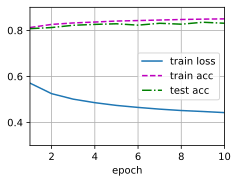

In [ ]:
num_epochs = 10
train_ch3(net,train_iter,test_iter,cross_entropy,num_epochs,updater)

## 3.6.7 预测

现在训练已经完成，我们的模型已经准备好对图像进行分类预测。 给定一系列图像，我们将比较它们的实际标签（文本输出的第一行）和模型预测（文本输出的第二行）。

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


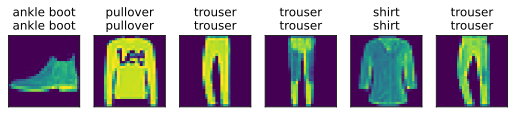

In [ ]:
def predict_ch3(net,test_iter,n=6):
  for X,y in test_iter:
    break
  trues = d2l.get_fashion_mnist_labels(y)
  preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
  titles = [true+'\n'+pred for true,pred in zip(trues,preds)]
  d2l.show_images(
      X[0:n].reshape((n,28,28)),1,n,titles = titles[0:n])

predict_ch3(net,test_iter)

##  3.6.8 小结

*   借助softmax回归，我们可以训练多分类的模型
*   训练softmax回归循环模型与训练线性回归模型非常相似：先读取数据，再定义模型和损失函数，然后使用优化算法训练模型。大多数常见的深度学习模型都有类似的训练过程。

# 3.7softmax回顾简介实现

在 3.3节中， 我们发现通过深度学习框架的高级API能够使实现

线性回归变得更加容易。 同样，通过深度学习框架的高级API也能更方便地实现softmax回归模型。 本节如在 3.6节中一样， 继续使用Fashion-MNIST数据集，并保持批量大小为256。

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## 3.7.1 初始化模型参数

如我们在 3.4节所述， softmax回归的输出层是一个全连接层。 因此，为了实现我们的模型， 我们只需在Sequential中添加一个带有10个输出的全连接层。 同样，在这里Sequential并不是必要的， 但它是实现深度模型的基础。 我们仍然以均值0和标准差0.01随机初始化权重。

In [ ]:
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

## 3.7.2 重新审视softmax的实现

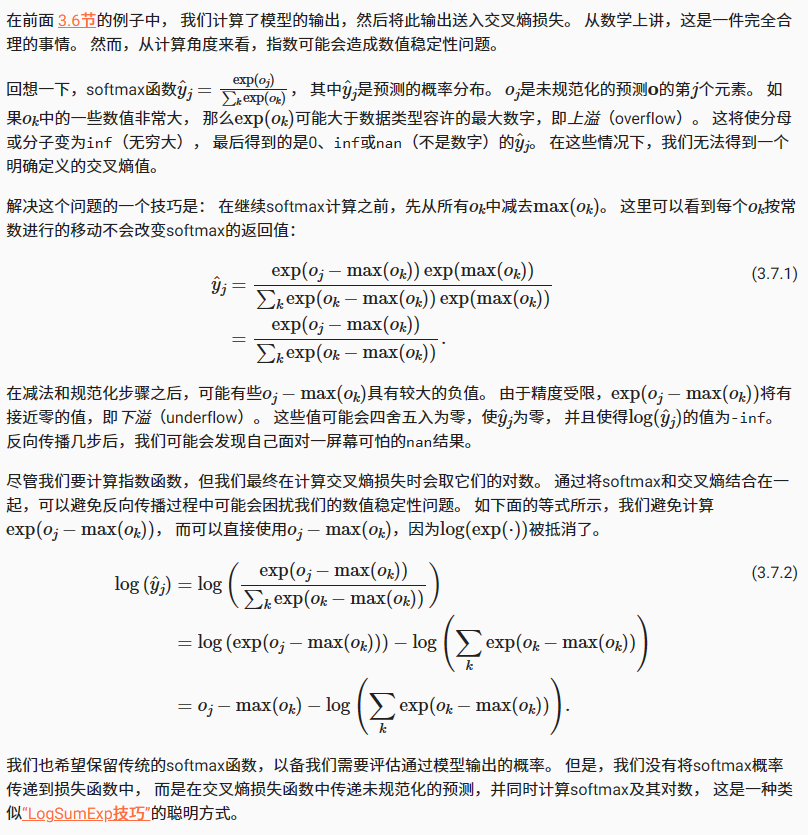

In [ ]:
loss = nn.CrossEntropyLoss(reduction='none')

## 3.7.3 优化算法

在这里，我们使用学习率为0.1的小批量随机梯度下降作为优化算法。 这与我们在线性回归例子中的相同，这说明了优化器的普适性。

In [ ]:
trainer = torch.optim.SGD(net.parameters(),lr=0.1)

## 3.7.4 训练

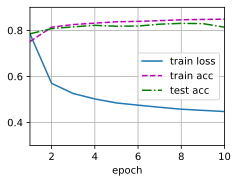

In [ ]:

num_epochs = 10
train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

## 3.7.5 小结



*   使用深度学习框架的高级API，我们可以更简洁地实现softmax回归。
*   从计算的角度来看，实现softmax回归比较复杂。在许多情况下，深度学习框架在这些著名的技巧之外采取了额外的预防措施，来确保数值的稳定性。这使我们避免了在实践中从零开始编写模型时可能遇到的陷阱。

